In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
import datetime
from matplotlib.ticker import FuncFormatter
import warnings
import math as ma
warnings.filterwarnings("ignore")
from pandas import ExcelWriter
from pandas import ExcelFile

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [7]:
cd = pd.read_excel('Customer_Master_FINAL.xlsx', sheetname="CustomerDemographic")
ca = pd.read_excel('Customer_Master_FINAL.xlsx', sheetname="CustomerAddress")
ts = pd.read_excel('Customer_Master_FINAL.xlsx', sheetname="Transactions")
nc = pd.read_excel('Customer_Master_FINAL.xlsx', sheetname="NewCustomerList")

In [9]:
cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [10]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


In [11]:
cd.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [12]:
cd['default'].value_counts()

100                                                                                                                                                                                                                   113
1                                                                                                                                                                                                                     112
-1                                                                                                                                                                                                                    111
-100                                                                                                                                                                                                                   99
â°â´âµâââ                                                                                                                       

In [13]:
cd = cd.drop('default', axis=1)

In [14]:
cd['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
F            1
Femal        1
Name: gender, dtype: int64

In [22]:
cd['gender'] = cd['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('NotMentioned','Others')

In [23]:
cd['gender'].value_counts()

Female    2039
Male      1873
Others      88
Name: gender, dtype: int64

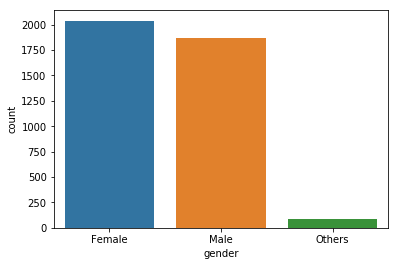

In [24]:
sb.countplot(cd['gender'])

In [26]:
ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [27]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.5+ KB


In [28]:
ca.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [32]:
ca['state'] = ca['state'].replace('VIC','Victoria')

In [33]:
ca['state'].value_counts()

NSW                2054
Victoria           1021
QLD                 838
New South Wales      86
Name: state, dtype: int64

In [34]:
ts.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [35]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [36]:
ts['product_first_sold_date'] = pd.to_datetime(ts['product_first_sold_date'], unit='s')
ts['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

In [37]:
ts.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [38]:
nc.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.88,1.10,1.3750,1.168750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.51,0.51,0.6375,0.541875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.50,0.50,0.5000,0.500000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.44,0.55,0.5500,0.550000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.97,0.97,1.2125,1.212500,4,4,1.703125


In [39]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

In [40]:
nc.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [41]:
cols = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
nc = nc.drop(cols, axis=1)

In [42]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

In [43]:
nc['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [45]:
nc['gender'] = nc['gender'].replace('U','Others')

In [46]:
nc['gender'].value_counts()

Female    513
Male      470
Others     17
Name: gender, dtype: int64

In [47]:
cd['customer_id'].iloc[-1]

4000

In [48]:
nc.insert(0, 'customer_id', range(4001, 4001 + len(nc)))

In [49]:
nc.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,4003,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [50]:
cd.sort_values(by=['customer_id'], inplace=True)
cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [51]:
cm = pd.concat([cd, nc], ignore_index=True, sort=False)
cm.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
cd = cm

In [53]:
cd

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
current_yr=2020
for i in cd['DOB']:
    cd['age']=current_yr - pd.DatetimeIndex(cd['DOB']).year

In [55]:
cd

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0


In [56]:
print(min(cd['age']))

18.0


In [57]:
x1 = cd[(cd['age'] <= 30)]
x1 = len(x1)u

x2 = cd[(cd['age']>30)&(cd['age']<60)]
x2 = len(x2)

x3 = cd[(cd['age'] >= 60)]
x3 =len(x3)

In [59]:
m1 = cd[(cd['age'] <= 30) & 
          (cd['gender']=='Male')] 
m1 = len(m1)

m2 = cd[(cd['age']>30) &(cd['age']<60) & 
          (cd['gender']=='Male')] 
m2 = len(m2)

m3 = cd[(cd['age'] >= 60) & 
          (cd['gender']=='Male')] 
m3 = len(m3)

In [60]:
f1 = cd[(cd['age'] <= 30) & 
          (cd['gender']=='Female')] 
f1 = len(f1)

f2 = cd[(cd['age']>30) &(cd['age']<60) & 
          (cd['gender']=='Female')] 
f2 = len(f2)

f3 = cd[(cd['age'] >= 60) & 
          (cd['gender']=='Female')] 
f3 =len(f3)

In [61]:
X = ['Under 30', 'Between 30 and 60', 'Over 60']
x = [x1, x2, x3]

M = ['Under 30', 'Between 30 and 60', 'Over 60']
m = [m1, m2, m3]

F = ['Under 30', 'Between 30 and 60', 'Over 60']
f = [f1, f2, f3]

Text(2.1, 3000, 'Total')

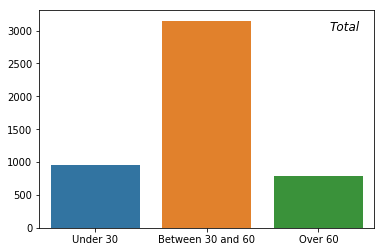

In [62]:
sb.barplot(X,x)
plt.text(2.1,3000, "Total", fontsize = 12, color='Black', fontstyle='italic')

Text(2.1, 1400, 'Male')

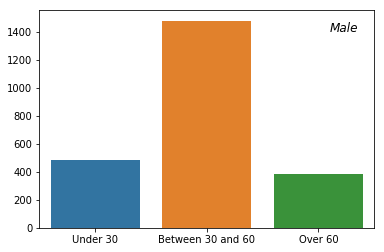

In [64]:
sb.barplot(M,m)
plt.text(2.1,1400, "Male", fontsize = 12, color='Black', fontstyle='italic')

Text(1.98, 1600, 'Female')

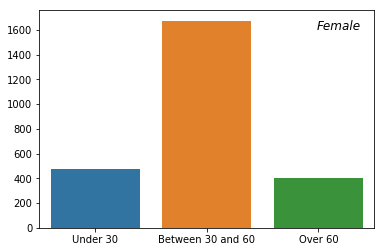

In [65]:
sb.barplot(x = F,y = f)
plt.text(1.98,1600, "Female", fontsize = 12, color='Black', fontstyle='italic')

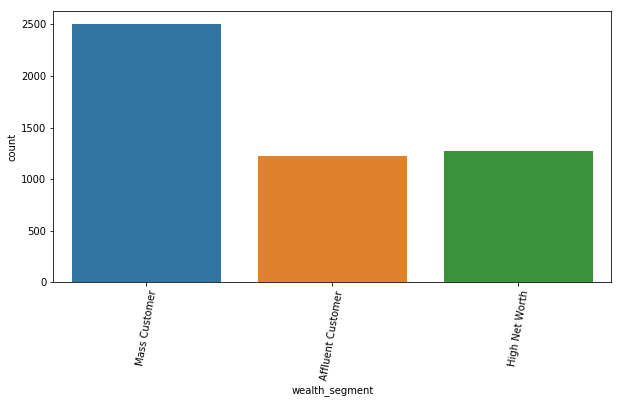

In [66]:
fig = plt.figure(figsize=(10,5))
chart=sb.countplot(x='wealth_segment',data=cd)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()

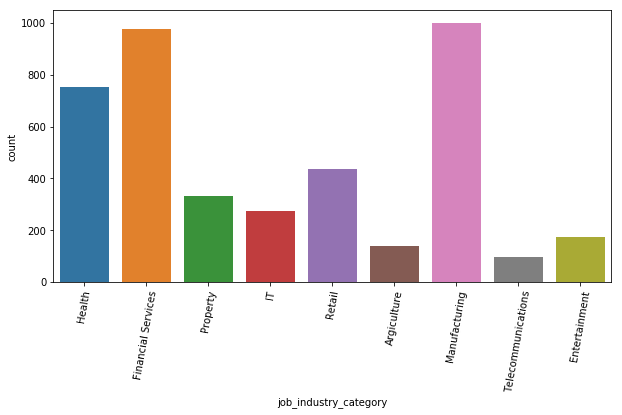

In [67]:
fig = plt.figure(figsize=(10,5))
chart=sb.countplot(x='job_industry_category',data=cd)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()

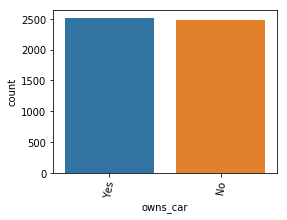

In [69]:
fig = plt.figure(figsize=(4,3))
chart=sb.countplot(x='owns_car',data=cd)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()

In [70]:
avg_tenure=cd['tenure'].mean()
avg_tenure

10.805821290453897